# MetroPT 3 FAILURE DETECTION PROJECT

# INTRODUCTION

Public transportation systems play a crucial role in urban mobility, and their reliability is essential for efficient operations. 

The **MetroPT 3 FAILURE DETECTION PROJECT** aims to leverage data science and machine learning techniques to predict failures in metro systems using the **MetroPT 3 Dataset**. By analyzing historical data, this project seeks to identify patterns and anomalies that contribute to system failures, enabling proactive maintenance and reducing downtime.

This project will involve:
- Exploratory data analysis (EDA)
- Feature engineering
- Development of classification models to accurately predict failures

The outcome of this research can aid transit authorities in:
- Improving service reliability
- Optimizing maintenance schedules
- Minimizing disruptions for commuters

With a data-driven approach, this project aims to enhance metro system efficiency and contribute to smarter, more resilient public transportation networks.

# IMPORT STATEMENTS

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# DATA LOADING

In [92]:
file_path = 'C:\\ENTRI\\main project\\metropt+3+dataset\\MetroPT3(AirCompressor).csv'
data = pd.read_csv(file_path)

# DATA EXPLORATION

In [94]:
print("First 5 rows of data:")
print(data.head())

First 5 rows of data:
   Unnamed: 0            timestamp    TP2    TP3     H1  DV_pressure  \
0           0  2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024   
1          10  2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022   
2          20  2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022   
3          30  2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022   
4          40  2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022   

   Reservoirs  Oil_temperature  Motor_current  COMP  DV_eletric  Towers  MPG  \
0       9.358           53.600         0.0400   1.0         0.0     1.0  1.0   
1       9.348           53.675         0.0400   1.0         0.0     1.0  1.0   
2       9.338           53.600         0.0425   1.0         0.0     1.0  1.0   
3       9.328           53.425         0.0400   1.0         0.0     1.0  1.0   
4       9.318           53.475         0.0400   1.0         0.0     1.0  1.0   

   LPS  Pressure_switch  Oil_level  Caudal_impulses  
0  0.0    

In [9]:
print("\nData Info:")
print(data.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1516948 non-null  int64  
 1   timestamp        1516948 non-null  object 
 2   TP2              1516948 non-null  float64
 3   TP3              1516948 non-null  float64
 4   H1               1516948 non-null  float64
 5   DV_pressure      1516948 non-null  float64
 6   Reservoirs       1516948 non-null  float64
 7   Oil_temperature  1516948 non-null  float64
 8   Motor_current    1516948 non-null  float64
 9   COMP             1516948 non-null  float64
 10  DV_eletric       1516948 non-null  float64
 11  Towers           1516948 non-null  float64
 12  MPG              1516948 non-null  float64
 13  LPS              1516948 non-null  float64
 14  Pressure_switch  1516948 non-null  float64
 15  Oil_level        1516948 non-null  float64
 16  Caudal

In [11]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
         Unnamed: 0           TP2           TP3            H1   DV_pressure  \
count  1.516948e+06  1.516948e+06  1.516948e+06  1.516948e+06  1.516948e+06   
mean   7.584735e+06  1.367826e+00  8.984611e+00  7.568155e+00  5.595619e-02   
std    4.379053e+06  3.250930e+00  6.390951e-01  3.333200e+00  3.824015e-01   
min    0.000000e+00 -3.200000e-02  7.300000e-01 -3.600000e-02 -3.200000e-02   
25%    3.792368e+06 -1.400000e-02  8.492000e+00  8.254000e+00 -2.200000e-02   
50%    7.584735e+06 -1.200000e-02  8.960000e+00  8.784000e+00 -2.000000e-02   
75%    1.137710e+07 -1.000000e-02  9.492000e+00  9.374000e+00 -1.800000e-02   
max    1.516947e+07  1.067600e+01  1.030200e+01  1.028800e+01  9.844000e+00   

         Reservoirs  Oil_temperature  Motor_current          COMP  \
count  1.516948e+06     1.516948e+06   1.516948e+06  1.516948e+06   
mean   8.985233e+00     6.264418e+01   2.050171e+00  8.369568e-01   
std    6.383070e-01     6.516261e+00   2.302053e+00  3.69405

# DATA CLEANING AND PREPROCESSING

In [14]:
data = data.drop(columns=['Unnamed: 0'])

In [16]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [18]:
print(data.isnull().sum())

timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64


In [20]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   timestamp        1516948 non-null  datetime64[ns]
 1   TP2              1516948 non-null  float64       
 2   TP3              1516948 non-null  float64       
 3   H1               1516948 non-null  float64       
 4   DV_pressure      1516948 non-null  float64       
 5   Reservoirs       1516948 non-null  float64       
 6   Oil_temperature  1516948 non-null  float64       
 7   Motor_current    1516948 non-null  float64       
 8   COMP             1516948 non-null  float64       
 9   DV_eletric       1516948 non-null  float64       
 10  Towers           1516948 non-null  float64       
 11  MPG              1516948 non-null  float64       
 12  LPS              1516948 non-null  float64       
 13  Pressure_switch  1516948 non-null  float64       
 14  Oi

# VISUALIZATION

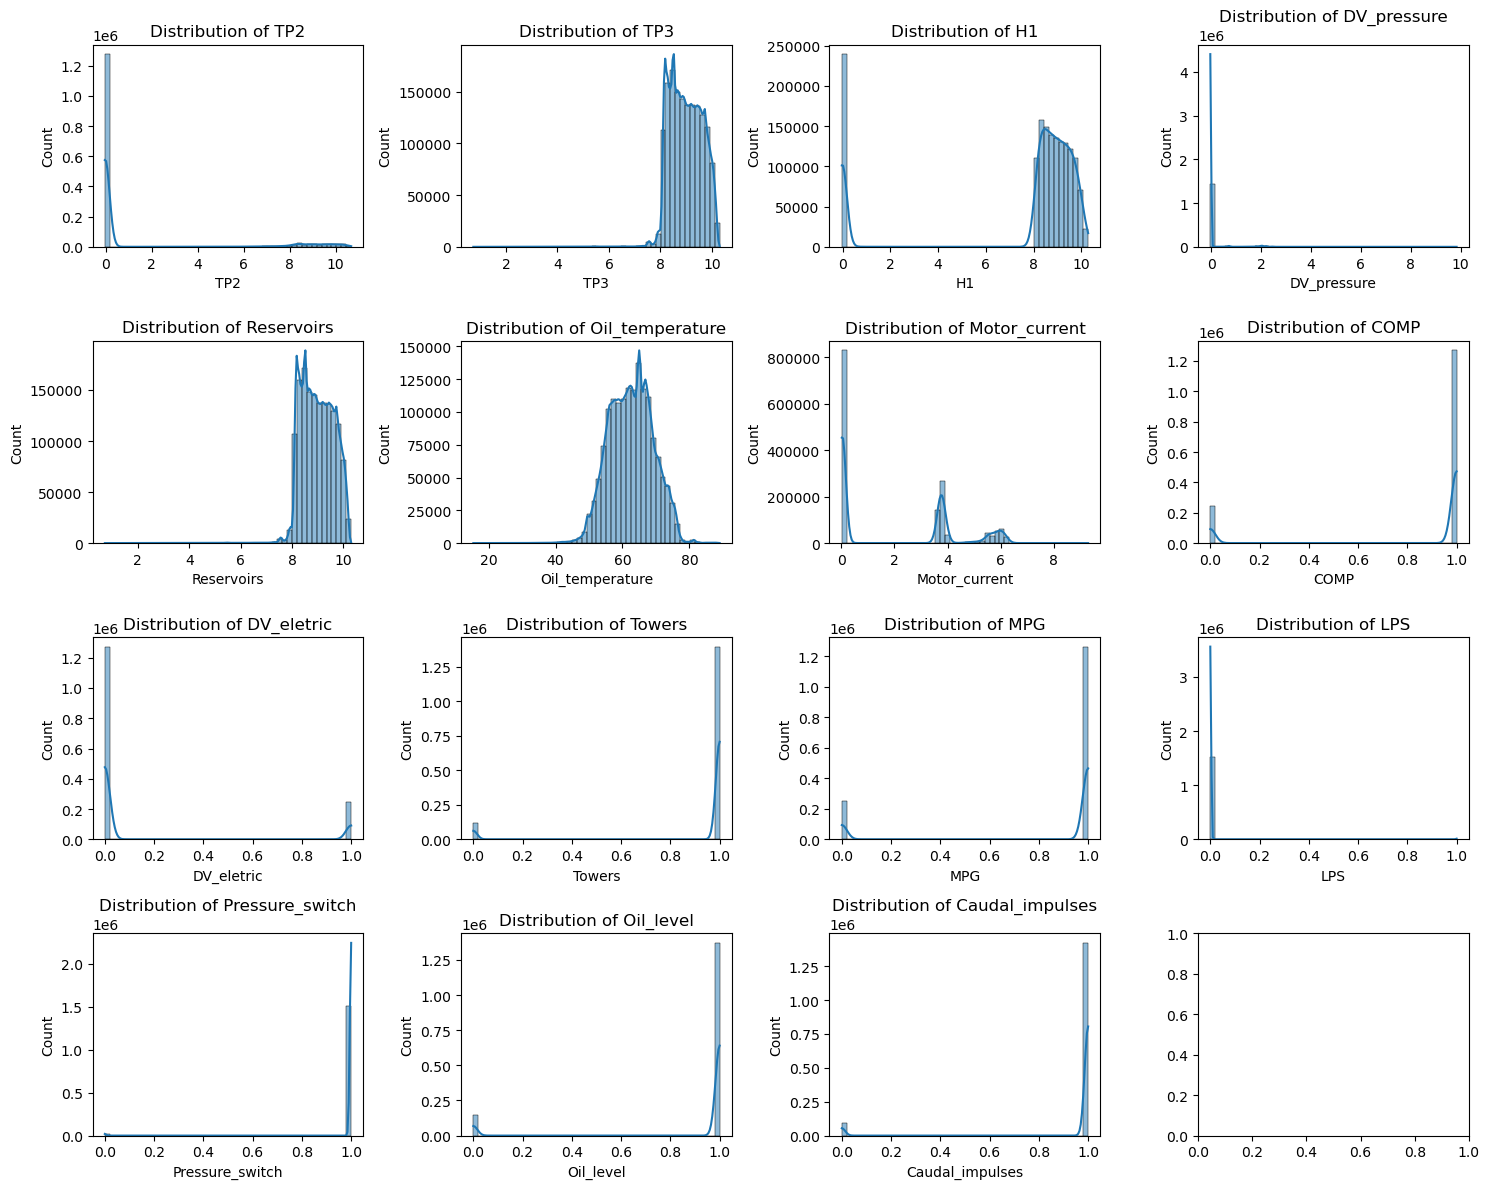

In [50]:
num_columns = data.select_dtypes(include=['float64']).columns
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(num_columns):
    sns.histplot(data[col], bins=50, kde=True, ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [23]:
failure_periods = [
    ('2020-04-18 00:00:00', '2020-04-18 23:59:00', 'Air Leak'),
    ('2020-05-29 23:30:00', '2020-05-30 06:00:00', 'Air Leak'),
    ('2020-06-05 10:00:00', '2020-06-07 14:30:00', 'Air Leak'),
    ('2020-07-15 14:30:00', '2020-07-15 19:00:00', 'Air Leak')
]
failure_df = pd.DataFrame(failure_periods, columns=['Start_Time', 'End_Time', 'Failure_Type'])
failure_df['Start_Time'] = pd.to_datetime(failure_df['Start_Time'])
failure_df['End_Time'] = pd.to_datetime(failure_df['End_Time'])

In [25]:
data['Failure'] = 0

for _, row in failure_df.iterrows():
    mask = (data['timestamp'] >= row['Start_Time']) & (data['timestamp'] <= row['End_Time'])
    data.loc[mask, 'Failure'] = 1

<Figure size 1500x1000 with 0 Axes>

C:\Users\sanjay s\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


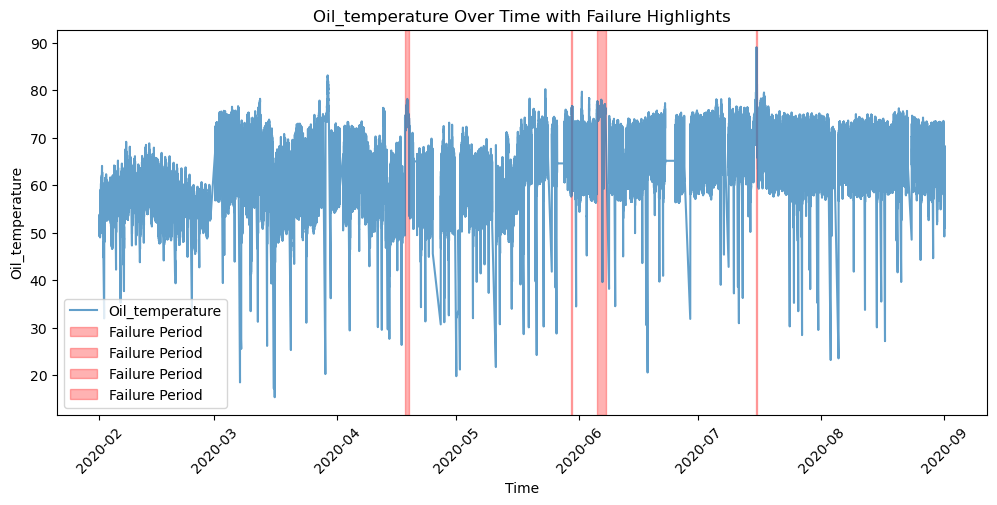

C:\Users\sanjay s\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


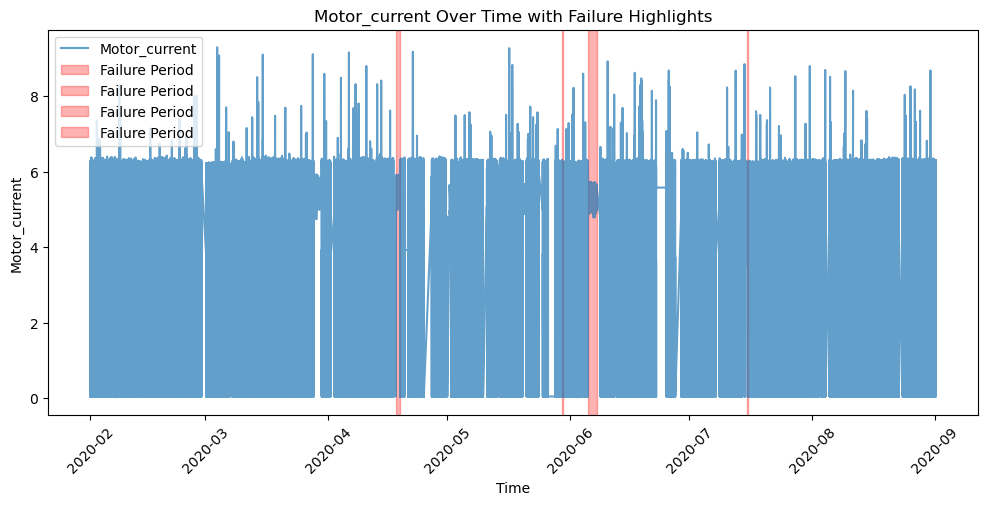

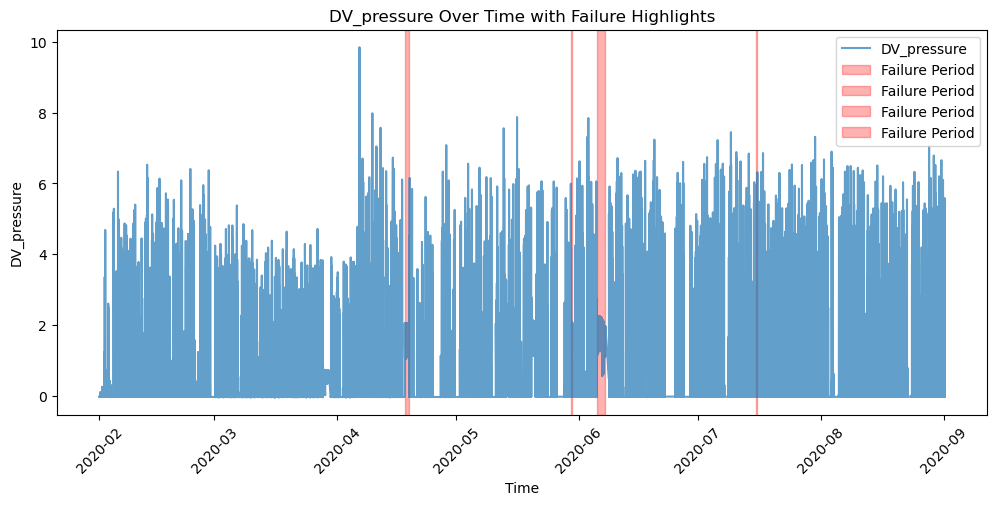

In [58]:
features_to_plot = ['Oil_temperature', 'Motor_current', 'DV_pressure']

plt.figure(figsize=(15, 10))

for feature in features_to_plot:
    plt.figure(figsize=(12, 5))
    sns.lineplot(x=data['timestamp'], y=data[feature], label=feature, alpha=0.7)

    for _, row in failure_df.iterrows():
        plt.axvspan(row['Start_Time'], row['End_Time'], color='red', alpha=0.3, label='Failure Period')

    plt.xlabel('Time')
    plt.ylabel(feature)
    plt.title(f'{feature} Over Time with Failure Highlights')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

<Figure size 1200x600 with 0 Axes>

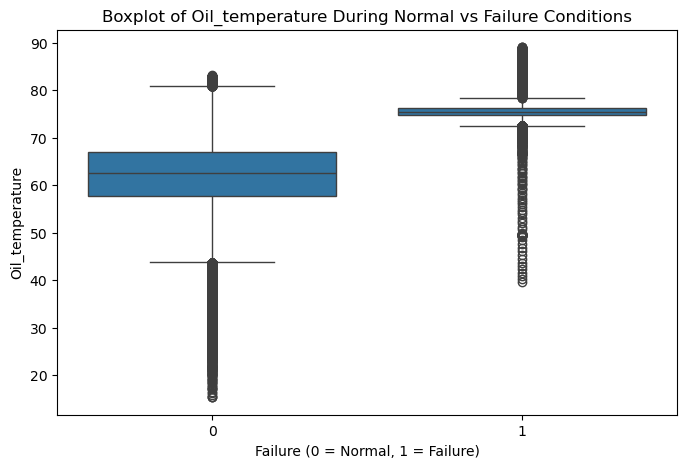

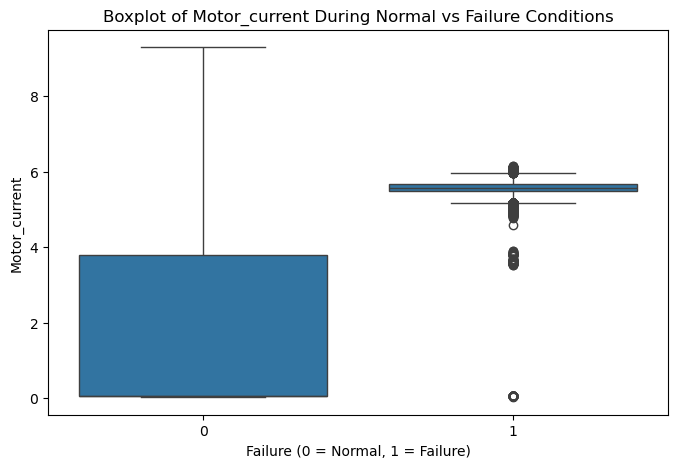

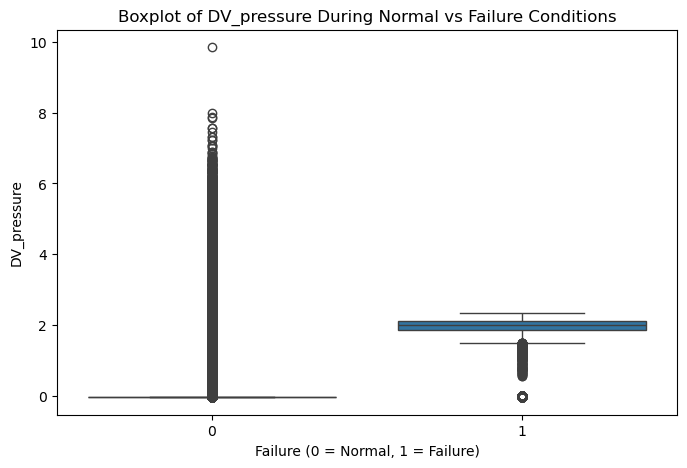

In [60]:
plt.figure(figsize=(12, 6))
features_to_plot = ['Oil_temperature', 'Motor_current', 'DV_pressure']

for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data['Failure'].astype(str), y=data[feature])
    plt.xlabel('Failure (0 = Normal, 1 = Failure)')
    plt.ylabel(feature)
    plt.title(f'Boxplot of {feature} During Normal vs Failure Conditions')
    plt.show()

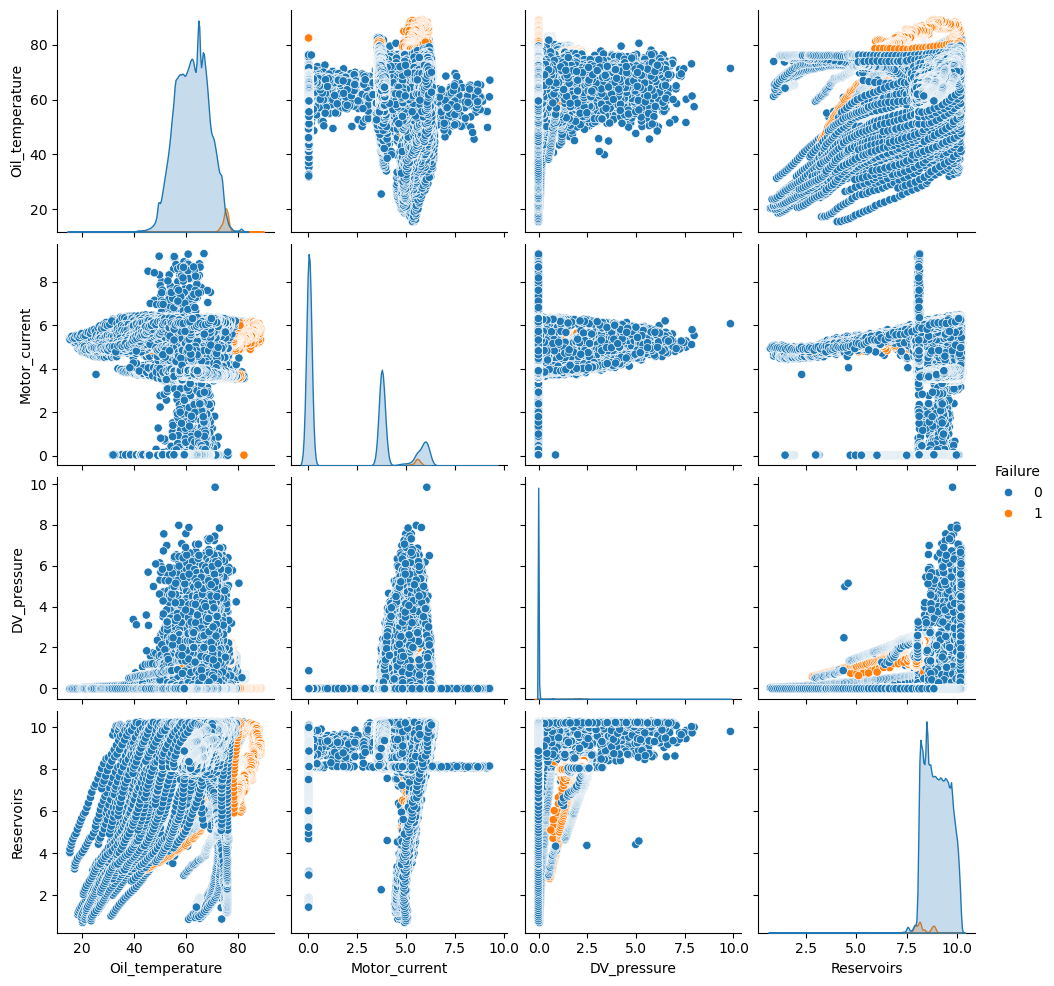

In [74]:
sns.pairplot(data, hue='Failure', diag_kind='kde', 
             vars=['Oil_temperature', 'Motor_current', 'DV_pressure', 'Reservoirs'])
plt.show()

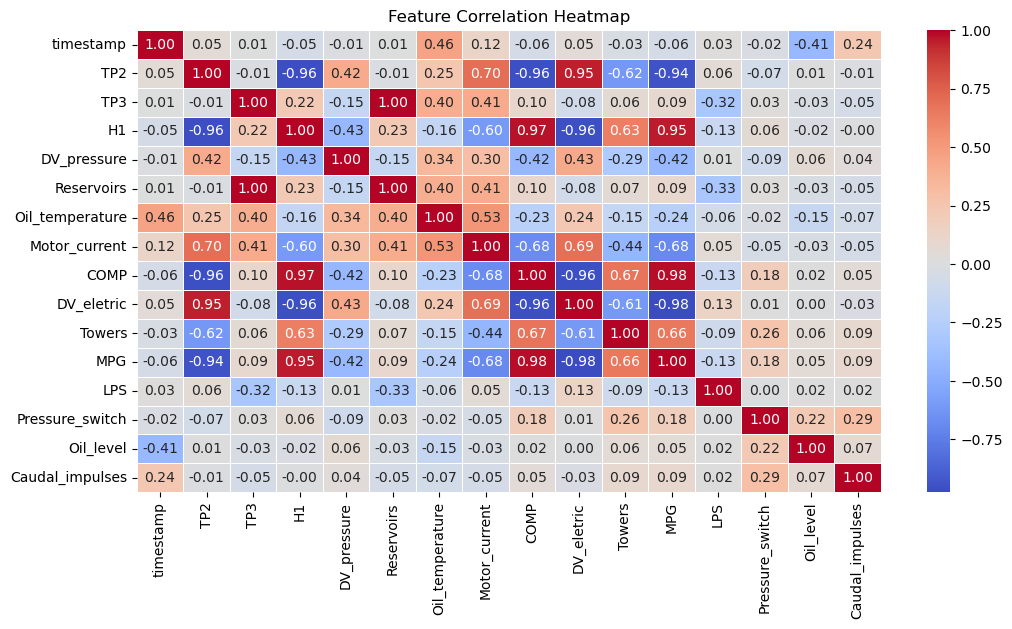

In [66]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.drop(columns=['Failure']).corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# PREDECTIVE MODELLING

In [27]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

data['Failure'] = 0

for period in failure_periods:
    start, end = pd.to_datetime(period[0]), pd.to_datetime(period[1])
    mask = (data['timestamp'] >= start) & (data['timestamp'] <= end)
    data.loc[mask, 'Failure'] = 1

print(data['Failure'].value_counts())

Failure
0    1486994
1      29954
Name: count, dtype: int64


# Logistic Regression


🔹 Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    297399
           1       0.75      0.80      0.77      5991

    accuracy                           0.99    303390
   macro avg       0.87      0.90      0.88    303390
weighted avg       0.99      0.99      0.99    303390



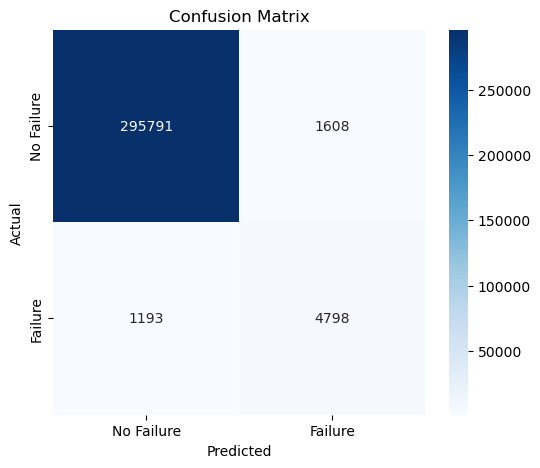

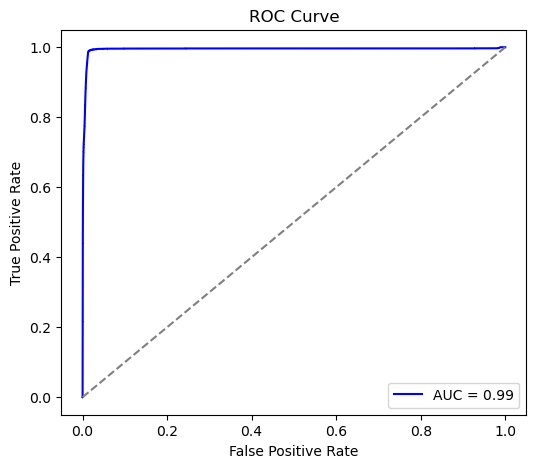

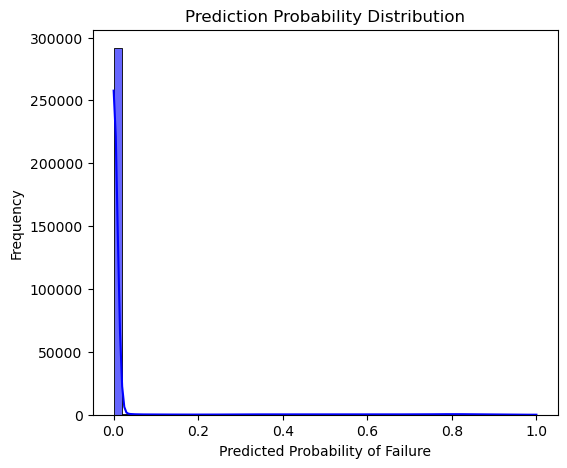

In [29]:
X = data.drop(columns=['Failure', 'timestamp'])
y = data['Failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

print("\n🔹 Logistic Regression Results:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
sns.histplot(y_pred_prob, bins=50, kde=True, color='blue', alpha=0.6)
plt.xlabel('Predicted Probability of Failure')
plt.ylabel('Frequency')
plt.title('Prediction Probability Distribution')
plt.show()

# Decision Tree


🔹 Decision Tree Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    297399
           1       0.98      0.98      0.98      5991

    accuracy                           1.00    303390
   macro avg       0.99      0.99      0.99    303390
weighted avg       1.00      1.00      1.00    303390



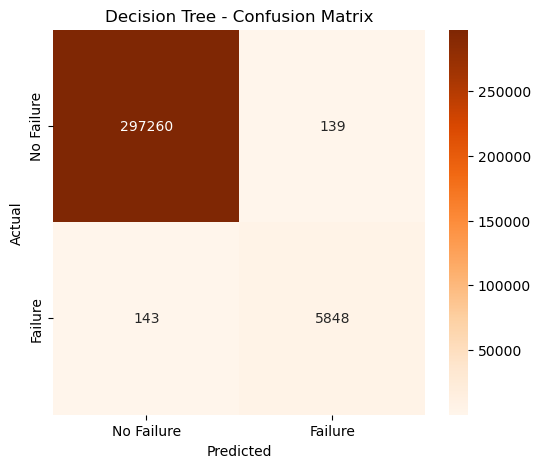

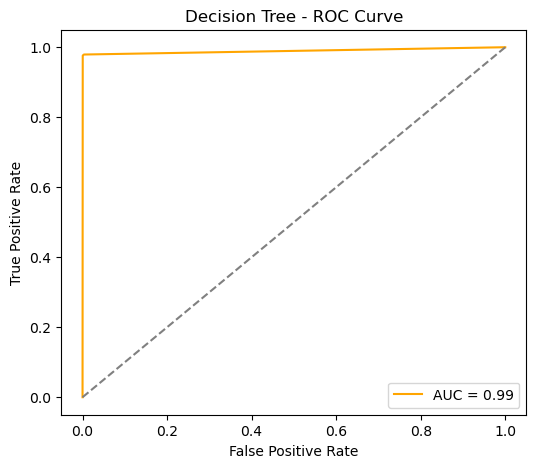

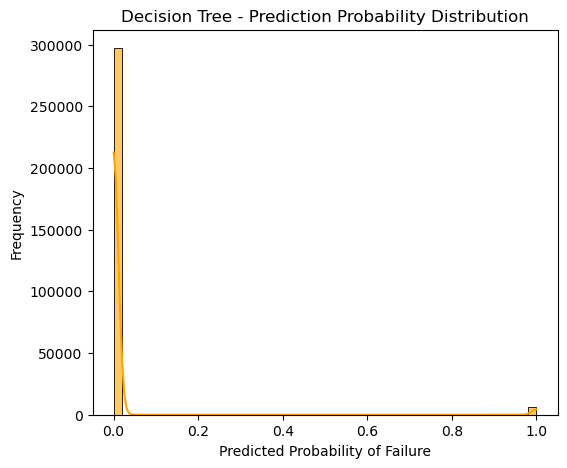

In [78]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)
y_pred_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

print("\n🔹 Decision Tree Results:")
print(classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree - Confusion Matrix')
plt.show()

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(6, 5))
plt.plot(fpr_dt, tpr_dt, color='orange', label=f'AUC = {roc_auc_dt:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree - ROC Curve')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
sns.histplot(y_pred_prob_dt, bins=50, kde=True, color='orange', alpha=0.6)
plt.xlabel('Predicted Probability of Failure')
plt.ylabel('Frequency')
plt.title('Decision Tree - Prediction Probability Distribution')
plt.show()

# Random Forest


🔹 Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    297399
           1       0.98      0.99      0.99      5991

    accuracy                           1.00    303390
   macro avg       0.99      0.99      0.99    303390
weighted avg       1.00      1.00      1.00    303390



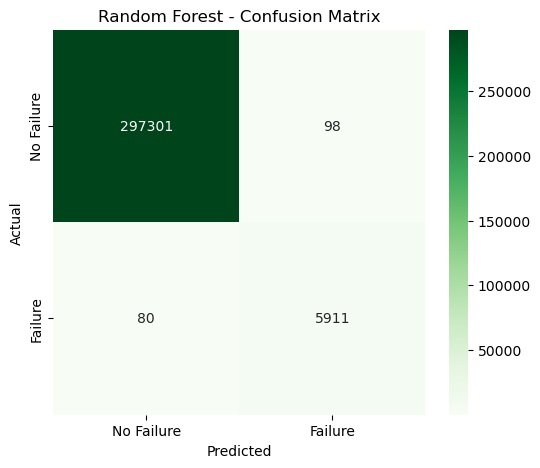

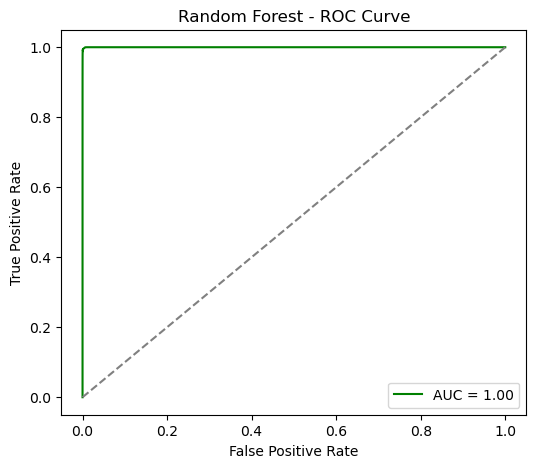

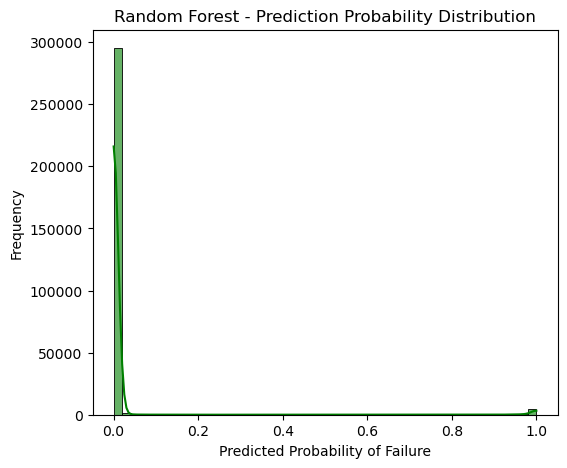

In [35]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

print("\n🔹 Random Forest Results:")
print(classification_report(y_test, y_pred_rf))


plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, color='green', label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
sns.histplot(y_pred_prob_rf, bins=50, kde=True, color='green', alpha=0.6)
plt.xlabel('Predicted Probability of Failure')
plt.ylabel('Frequency')
plt.title('Random Forest - Prediction Probability Distribution')
plt.show()

# XGBoost

C:\Users\sanjay s\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:05:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔹 XGBoost Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    297399
           1       0.98      0.98      0.98      5991

    accuracy                           1.00    303390
   macro avg       0.99      0.99      0.99    303390
weighted avg       1.00      1.00      1.00    303390



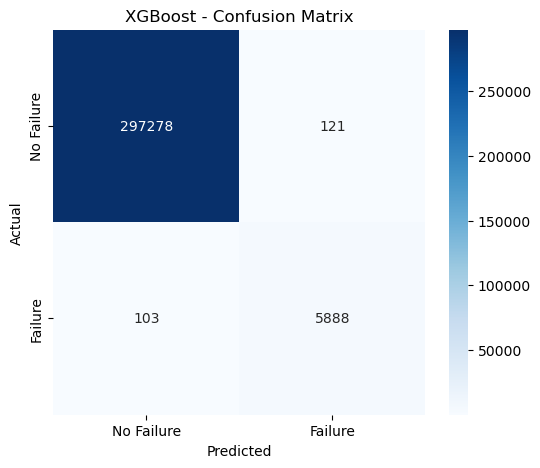

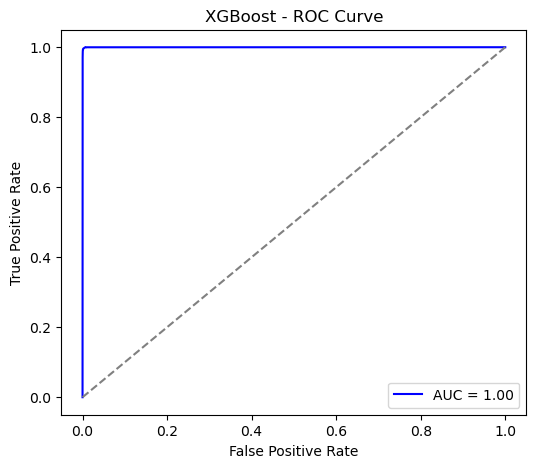

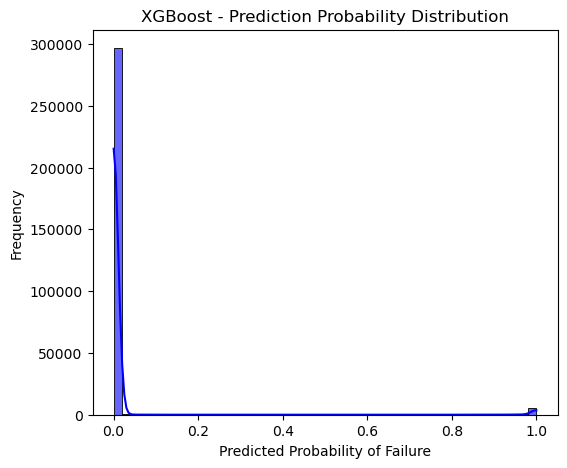

In [33]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

print("\n🔹 XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost - Confusion Matrix')
plt.show()

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(6, 5))
plt.plot(fpr_xgb, tpr_xgb, color='blue', label=f'AUC = {roc_auc_xgb:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost - ROC Curve')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
sns.histplot(y_pred_prob_xgb, bins=50, kde=True, color='blue', alpha=0.6)
plt.xlabel('Predicted Probability of Failure')
plt.ylabel('Frequency')
plt.title('XGBoost - Prediction Probability Distribution')
plt.show()

# Feature Importance Comparison Plot between XGBoost and Random Forest

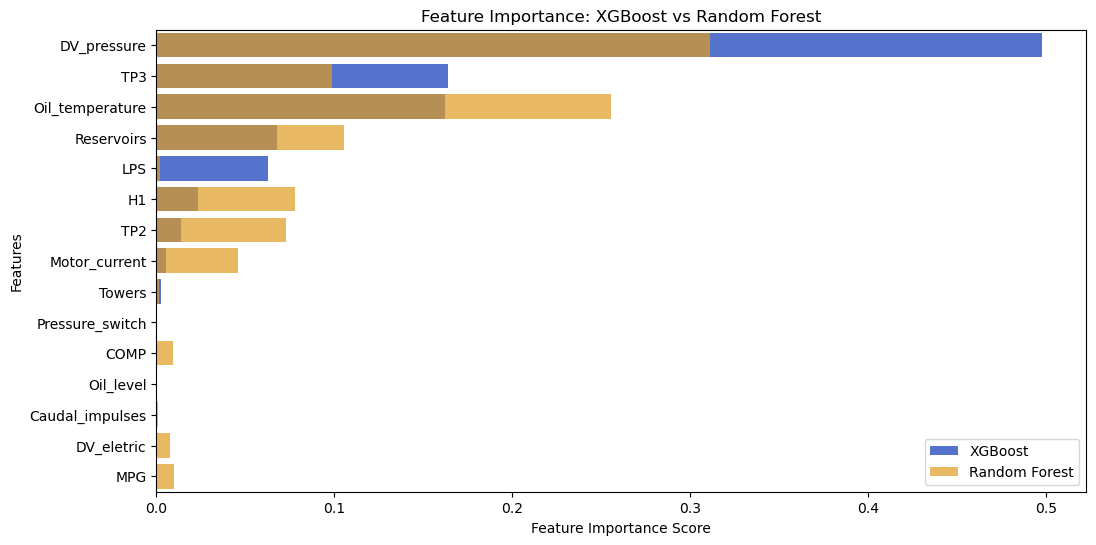

In [37]:
xgb_importance = xgb_model.feature_importances_
rf_importance = rf_model.feature_importances_

features = data.drop(columns=['Failure', 'timestamp']).columns
importance_df = pd.DataFrame({'Feature': features, 'XGBoost': xgb_importance, 'Random Forest': rf_importance})

importance_df = importance_df.sort_values(by='XGBoost', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='XGBoost', y='Feature', data=importance_df, color='royalblue', label="XGBoost")
sns.barplot(x='Random Forest', y='Feature', data=importance_df, color='orange', alpha=0.7, label="Random Forest")

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance: XGBoost vs Random Forest")
plt.legend()
plt.show()

# Final Conclusion: Best Model Selection for Failure Classification

# Project Overview
The goal of this project was to classify failures using various machine learning models on the MetroPT 3 Dataset. We tested multiple models, including Logistic Regression, Decision Tree, Random Forest, and XGBoost, and evaluated their performance based on accuracy, precision, recall, and F1-score.

# Model Performance Summary

# Final Model Selection: Random Forest
Why Random Forest?

1.**Highest Recall (0.99 for Class 1 - Failures)** → This means it identifies failures more accurately than other models.

2.**Excellent Precision & F1-Score (0.98 & 0.99 respectively)** → Ensures minimal false positives while maintaining high accuracy.

3.**Robustness & Stability** → Handles non-linearity and complex interactions better than a single decision tree.

4.**Feature Importance** → Provides insights into the most influential features in predicting failures (as seen in the feature importance plot).

# Conclusion
After evaluating multiple models, Random Forest is the best-performing model for failure classification in the MetroPT 3 Dataset. It provides high accuracy, excellent recall, and strong generalization. This model can now be deployed for real-time failure prediction and preventive maintenance strategies.